# Inlämningsuppgift 3 - Visualisering
Mattias Kallman 2019

### Uppgiftens beskrivning:

Uppgiften handlar om att lyckas presentera data med hjälp av matPlotLib. Inom datavetenskap visualiserar vi data för att presentera, analysera och illustrera.

Se över dokumentationen och exemplen för matplotlib för att se vilka sorters grafer är möjligt att lätt få fram med python.


1. Stapel-, linjediagram
Moores lag säger att antalet transistorer i en mikroprosessor fördubblas ungefär varje 2 år. Stämmer det?
Scrapea, tvätta och sortera data från ​https://en.wikipedia.org/wiki/Transistor_count​ och rita sedan:

    a) Ett stapeldiagram som illustrerar hur många processorer som producerades per årtionde.

    b) Ett linjediagram som illustrerar ökningen i tillverkningsnoggranheten
Använd alla de följande matplotlib kommandon för att editera din graf så att den ser informativ ut:
xticks, yticks xlim, ylim grid legend xlabel, ylabel title annotate alpha


2. Korrelation med scatter
Rita en scatterplot av transistorantalens utveckling i förhållande till årtal, likt bilden på wikipedia sidan.
Använd logaritmisk skala på y-axeln, och sätt in en linje (“trendline”) som visar vad ökningen borde vara enligt Moores lag.
Märk ut några valda punkter med prosessorns namn.


 3. Reflektion och feedback
Kommentera ditt utförande och visa eventuella delmoment du utförde som kommentarer i din .ipynb fil. Använd markup för att formattera längre förklaringar över vad du gjort i textform ovanför kodrutan, och kommentarer (#) i din kod för att illustrera vilka variabler som innehåller vad för data i vilket skede.
Den här deluppgiften är värd poäng, så var inte lat. Kommentarer och klar kod gör det även lättare att snabbt gå igenom er kod!
Alla deltagare i kursen ska lämna in EN .ipynb fil och en tillhörande .csv fil. Uppgiften bedöms med vitsordet 0-5.
Lycka till!


# Här börjar min lösning av uppgift 3:

### Importerar biblioteken jag kommer att använda mig av och lägger inställningar så som jag vill ha dem.

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd
import numpy as np
import re
from datetime import datetime
import os
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
pd.set_option('display.max_rows', 200)

### Skapar en funktion som hämtar önskad websida. I det här fallet så vill vi hämta wikipedia artikeln om transitorer.

In [2]:
# Function that fetches website and returns it as a parsed BeautifulSoup object

def get_website(website):
    """website=<URL>"""
    return soup(urlopen(website).read().decode('utf-8', 'ignore'))

In [3]:
# Call function and assign values to a variable to work with locally.

web_page = get_website(website='https://en.wikipedia.org/wiki/Transistor_count')

# Other way of getting data into DataFrame
df_test = pd.read_html('https://en.wikipedia.org/wiki/Transistor_count')


In [4]:
# Test that web page loads

print(web_page.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Transistor count - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Transistor_count","wgTitle":"Transistor count","wgCurRevisionId":922817394,"wgRevisionId":922817394,"wgArticleId":4469365,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from May 2019","CS1 German-language sources (de)","Use mdy dates from January 2015","Articles containing potentially dated statements from 2019","All articles containing potentially dated statements","Articles containing potentially dated statements from 2018","Articles containing potentially dated statements from 2016","All accuracy disputes","Articles with disputed statements f

In [5]:
# Loads tables directly into a DataFrame containing many DataFrames, search index to find the table we want to use.
df_test[0] # this was shown in class after i had finished this part on my own. many ways to solve the same problem :)

,Processor,MOS transistor count,Date ofintroduction,Designer,MOSprocess,Area
0,"MP944 (20-bit, 6-chip)",?,1970[19][a],Garrett AiResearch,?,?
1,"Intel 4004 (4-bit, 16-pin)",2250,1971,Intel,"10,000 nm",12 mm²
2,"Intel 8008 (8-bit, 18-pin)",3500,1972,Intel,"10,000 nm",14 mm²
3,"NEC μCOM-4 (4-bit, 42-pin)","2,500[21][22]",1973,NEC,"7,500 nm[23]",?
4,Toshiba TLCS-12 (12-bit),"11,000+[24]",1973,Toshiba,"6,000 nm",32 mm²
5,"Intel 4040 (4-bit, 16-pin)",3000,1974,Intel,"10,000 nm",12 mm²
6,"Motorola 6800 (8-bit, 40-pin)",4100,1974,Motorola,"6,000 nm",16 mm²
7,"Intel 8080 (8-bit, 40-pin)",6000,1974,Intel,"6,000 nm",20 mm²
8,"TMS 1000 (4-bit, 28-pin)",8000,1974[25],Texas Instruments,"8,000 nm",11 mm²
9,"MOS Technology 6502 (8-bit, 40-pin)","4,528[b][26]",1975,MOS Technology,"8,000 nm",21 mm²


### Hämtar sedan tables datan från web_page objektet.
Har skapat två funktioner, en för att hämta titlarna på kolumnerna och den andra för att hämta själva innehållet.

In [6]:
# Fetches the table headers

def get_headers():
    list = ['Processor Name','Transitor Count','Year','Designer','Prod. Accuracy','Area']
    header_arr = list
    #for header in web_page.tbody.find_all("th"):
        #header_arr.append(header.text.replace("\n","").rstrip())
    return header_arr



# Fetches and treats the data from the table

def get_rows():
    
    # REPLACE RULES
    
    rep = {"\n": "", "\xa0mm²": "", "\xa0mm2": "", "\xa0nm": ""} # dict containing replace rules.
    rep = dict((re.escape(key), value) for key, value in rep.items()) 
    pattern = re.compile("|".join(rep.keys()))

    # Array variable where we put return values
    rows_arr = []
    
    # Items consist of 'tr' rows from web_page
    items = web_page.tbody.find_all("tr")
    
    # Loop thru the items
    for item in items:
        temp_item = []
        for element in item:
            if(element != "\n"):
                
                # REGEX RULES:
                
                temp_element = element.text
                # Removes all () and their contents
                temp_element = re.sub(r'\([^)]*\)', '', temp_element)
                # Removes all [] and their contents
                temp_element = re.sub(r'\[[^)]*\]', '', temp_element)
                
                # REPLACE RULEs are applied here
                temp_element = pattern.sub(lambda m: rep[re.escape(m.group(0))], temp_element)
                
                # Finally appends the treated data
                temp_item.append(temp_element)
        rows_arr.append(temp_item)
        del temp_item
    return rows_arr

In [7]:
# Assigning table data to variable
microprocessors = get_rows()

In [8]:
# we choose rows from 1 forward because 0 is equal to headers and we don't need them in the data
microprocessors[1:]

[['MP944 ', '?', '1970', 'Garrett AiResearch', '?', '?'],
 ['Intel 4004 ', '2,250', '1971', 'Intel', '10,000', '12'],
 ['Intel 8008 ', '3,500', '1972', 'Intel', '10,000', '14'],
 ['NEC μCOM-4 ', '2,500', '1973', 'NEC', '7,500', '?'],
 ['Toshiba TLCS-12 ', '11,000+', '1973', 'Toshiba', '6,000', '32'],
 ['Intel 4040 ', '3,000', '1974', 'Intel', '10,000', '12'],
 ['Motorola 6800 ', '4,100', '1974', 'Motorola', '6,000', '16'],
 ['Intel 8080 ', '6,000', '1974', 'Intel', '6,000', '20'],
 ['TMS 1000 ', '8,000', '1974', 'Texas Instruments', '8,000', '11'],
 ['MOS Technology 6502 ', '4,528', '1975', 'MOS Technology', '8,000', '21'],
 ['Intersil IM6100 ', '4,000', '1975', 'Intersil', '', ''],
 ['CDP 1801 ', '5,000', '1975', 'RCA', '', ''],
 ['RCA 1802 ', '5,000', '1976', 'RCA', '5,000', '27'],
 ['Zilog Z80 ', '8,500', '1976', 'Zilog', '4,000', '18'],
 ['Intel 8085 ', '6,500', '1976', 'Intel', '3,000', '20'],
 ['TMS9900 ', '8,000', '1976', 'Texas Instruments', '', ''],
 ['MC14500B ', '', '1977', 

In [9]:
# Function that converts normal python matrix to Pandas DataFrame model. Function also adds columns, etc.

def matrix_to_DataFrame(matrix):
    df = pd.DataFrame(matrix)

    #Cleaning up the data some more
    
    # Removing whitespaces from front and end of strings
    for i in df: 
        df[i] = df[i].str.strip()
    
    
    # Replacing/editing irrelevant data with np.nan or empty strings ""
    df[1] = df[1].str.replace("+","").replace("?",np.nan).replace('\,','', regex=True)
    df[1] = df[1].replace('', np.nan)
    df[4] = df[4].str.replace("+","").replace("?",np.nan)
    df[4] = df[4].replace('', np.nan).replace('\,','', regex=True)
    df[5] = df[5].str.replace("+","").replace("?",'')
    
    # Filling in 'None' values in column [2] giving them a year value
    df[2] = df[2].fillna(method='ffill')
    
    # Fixing one wierd value that has '&' in it
    df[4] = df[4].replace('7&12','12')
    
    # Dropping rows that contain nan values that are non-usable
    df = df.dropna()
    
    # Converting columns containing numbers into numeric values (float and int)
    df[1] = df[1].astype(float)
    df[2] = df[2].astype(int)
    df[4] = df[4].astype(float)
    
    # Reseting index values to clean up the DataFrame
    df = df.reset_index(drop=True)
    
    # Adding descriptive headers to columns
    headers = get_headers()
    df.columns = headers
    
    
    return df

In [10]:
# Convert python matrix to DataFrame object

df_microprocessors = matrix_to_DataFrame(matrix=microprocessors[1:])

In [11]:
# Previewing and checking that the DataFrame is clean and understandable

df_microprocessors

,Processor Name,Transitor Count,Year,Designer,Prod. Accuracy,Area
0,Intel 4004,2.250000e+03,1971,Intel,10000.0,12
1,Intel 8008,3.500000e+03,1972,Intel,10000.0,14
2,NEC μCOM-4,2.500000e+03,1973,NEC,7500.0,
3,Toshiba TLCS-12,1.100000e+04,1973,Toshiba,6000.0,32
4,Intel 4040,3.000000e+03,1974,Intel,10000.0,12
5,Motorola 6800,4.100000e+03,1974,Motorola,6000.0,16
6,Intel 8080,6.000000e+03,1974,Intel,6000.0,20
7,TMS 1000,8.000000e+03,1974,Texas Instruments,8000.0,11
8,MOS Technology 6502,4.528000e+03,1975,MOS Technology,8000.0,21
9,RCA 1802,5.000000e+03,1976,RCA,5000.0,27


### Då var datan uppstädad och vi kan börja med självaste visualisering!

##### 1 - a)  Ett stapeldiagram som illustrerar hur många processorer som producerades per årtionde.

In [12]:
# Creating a method that produces a bar chart from above dataframe.
def bar_chart_per_decade(dataframe):
    """dataframe requires a Pandas DataFrame object"""
    
    # Preparing data for bar chart
    
    df_decades = dataframe[['Year']]
    df_decades = df_decades.groupby(df_decades['Year'].floordiv(10) *10)
    df_decades = df_decades.count()
    x = df_decades.index.values
    y = df_decades['Year'].values
    
    # Creating the Chart and formating its appearance.
    
    plt.figure(figsize=(12,8))
    plt.bar(x, y, width=5,  edgecolor='blue', color='lightblue')
    plt.xticks(df_decades.index.values,fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Decade', fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.title('Processor Chipsets per Decade', fontsize=26)
    
    plt.show()

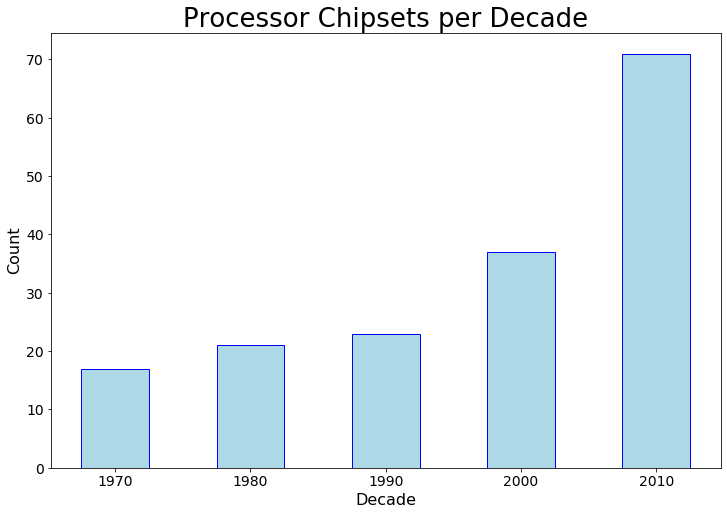

In [13]:
# Calling the method to displays the chart
bar_chart_per_decade(dataframe=df_microprocessors)

##### 1 - b) Ett linjediagram som illustrerar ökningen i tillverkningsnoggranheten Använd alla de följande matplotlib kommandon för att editera din graf så att den ser informativ ut: xticks, yticks xlim, ylim grid legend xlabel, ylabel title annotate alpha.

In [14]:
# Line diagram showing how the production accuracy has improved over the years
def line_diagram_production_accuracy(dataframe):
    """dataframe requires a Pandas DataFrame object"""
    
    # Variables and data used in calculations
    data = dataframe[['Year','Prod. Accuracy']]
    data = data.groupby(data['Year']).min()
    years = []
    years = dataframe['Year']
    values = []
    values = dataframe['Prod. Accuracy']
    
    
    # Creating and plotting the chart, adding visualisation elements and tweaking them.
    plt.figure(figsize=(18,8))
    plt.plot(data, 'go-',label='Prod. Acc', alpha=0.5)
    plt.title('Production Accuracy in Nanometers', fontsize=26)
   
    plt.xticks(dataframe['Year'][::24],fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('nanometer', fontsize=16)
    
    plt.xlim(years[0],years[len(years)-1])
    plt.ylim(0,values[0]+(values[0]/10))
    
    plt.legend()
    plt.grid(True)
    plt.show()

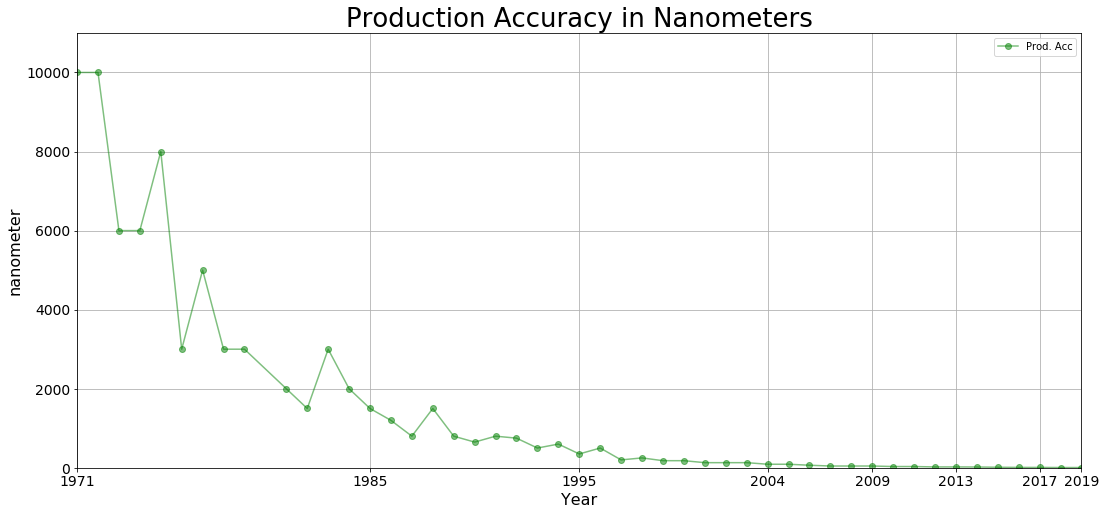

In [15]:
# Calling the method to displays the chart
line_diagram_production_accuracy(dataframe=df_microprocessors)

##### 2 - Korrelation med scatter Rita en scatterplot av transistorantalens utveckling i förhållande till årtal, likt bilden på wikipedia sidan. Använd logaritmisk skala på y-axeln, och sätt in en linje (“trendline”) som visar vad ökningen borde vara enligt Moores lag. Märk ut några valda punkter med prosessorns namn.

In [16]:
# Scatter plot and trend line showing processor development compared to Moore's Law
def moores_law_processors(dataframe):
    """dataframe requires a Pandas DataFrame object"""
    
    # Base variables and data used to create the scatter plot
    data_year = dataframe['Year']
    data_acc = dataframe['Transitor Count']
    
    # Here we calculate Moore's Law with the starting value of 2250 from the Intel 4004 from 1971.
    
    # x0 is starting year and x is equal to the last year in the list
    x0 = data_year.iloc[0]
    x = data_year.iloc[-1]
    x_arr = [x0, x]
    # year is the difference between the values of x and x0
    year = x-x0
    # y0 is the transistor count from the first processor
    y0 = data_acc.iloc[0]
    # y is Moore's Law applied counting forward to the last year in the list, in this example it is 2019
    y = y0 * (2**(year/2))
    y_arr = [y0, y]
    
    
    # Creating the Chart and formating its appearance.
    fig, ax = plt.subplots(figsize=(18,8))
    
    # Adding the trend line for Moore's Law
    ax.plot(x_arr,y_arr, color='red')
    # placing out the data points
    ax.scatter(data_year, data_acc, alpha=0.45, color='green')
    # Making the scaling log10
    ax.set_yscale("log")
    
    # Editing the apperance
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    ax.set_title('Moore\'s Law Compared to Processor Development', fontsize=26)
    ax.set_xlabel('Decade', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    
    # Adding some fun annotations
    ax.annotate('AMD Epyc Rome', xy=(2019, y_arr[1]), xytext=(2010, y_arr[1]*1.3),
            arrowprops=dict(facecolor='blue', arrowstyle='simple'),
            )
    ax.annotate('Intel 4004', xy=(1971, y_arr[0]), xytext=(1971, y_arr[0]*10.3),
            arrowprops=dict(facecolor='blue', arrowstyle='simple'),
            )
    plt.show()

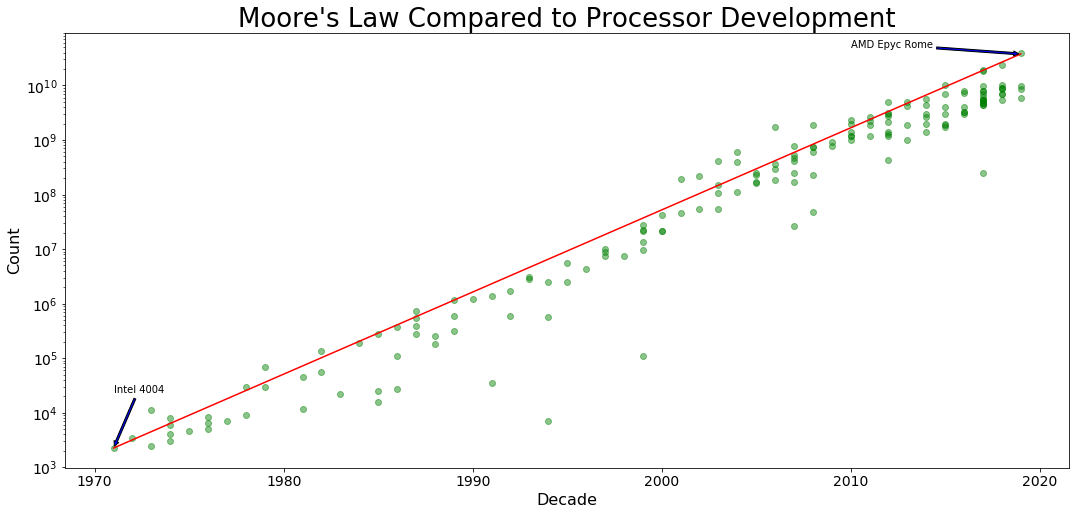

In [17]:
# Calling the method to displays the chart
moores_law_processors(dataframe=df_microprocessors)

    Liten kommentar angående varför inline kommentarerna i cellerna är på engelska. Jag har senare tänkt bygga de här projecten i vanliga python filer och sedan lägga dem på min git. bra illusereringar av databearbetningsförmåga.

# By Mattias Kallman 2019